# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [89]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | puerto penasco
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | masina
Processing Record 7 of Set 1 | hawaiian paradise park
Processing Record 8 of Set 1 | santana
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | kidal
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hadibu
Processing Record 17 of Set 1 | fort bragg
Processing Record 18 of Set 1 | ad dawadimi
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | west island
Processing Record 22

Processing Record 37 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | lihue
Processing Record 40 of Set 4 | kisangani
Processing Record 41 of Set 4 | lucapa
Processing Record 42 of Set 4 | berdigestyakh
Processing Record 43 of Set 4 | kamaishi
Processing Record 44 of Set 4 | san julian
Processing Record 45 of Set 4 | severo-yeniseyskiy
Processing Record 46 of Set 4 | thunder bay
Processing Record 47 of Set 4 | waingapu
Processing Record 48 of Set 4 | ilulissat
Processing Record 49 of Set 4 | am timan
Processing Record 0 of Set 5 | elverum
Processing Record 1 of Set 5 | port douglas
Processing Record 2 of Set 5 | okhotsk
Processing Record 3 of Set 5 | charlestown
Processing Record 4 of Set 5 | puerto cabezas
Processing Record 5 of Set 5 | andreapol'
Processing Record 6 of Set 5 | sur
Processing Record 7 of Set 5 | oranjemund
Processing Record 8 of Set 5 | meadow lake
Processing Record 9 of Set 5 | khandyga
Pr

Processing Record 25 of Set 8 | west bay
Processing Record 26 of Set 8 | sakaiminato
Processing Record 27 of Set 8 | turkmenbasy
Processing Record 28 of Set 8 | meerhoven
Processing Record 29 of Set 8 | mutuali
Processing Record 30 of Set 8 | rio grande
Processing Record 31 of Set 8 | pekanbaru
Processing Record 32 of Set 8 | baikonur
Processing Record 33 of Set 8 | glad
Processing Record 34 of Set 8 | castillos
Processing Record 35 of Set 8 | kirensk
Processing Record 36 of Set 8 | mirabad
Processing Record 37 of Set 8 | apolinario saravia
Processing Record 38 of Set 8 | altay
Processing Record 39 of Set 8 | yurty
Processing Record 40 of Set 8 | kachkanar
Processing Record 41 of Set 8 | mejit
Processing Record 42 of Set 8 | bani suwayf
Processing Record 43 of Set 8 | quang ngai
Processing Record 44 of Set 8 | puerto aysen
Processing Record 45 of Set 8 | nedryhayliv
Processing Record 46 of Set 8 | tshabong
Processing Record 47 of Set 8 | tsiombe
Processing Record 48 of Set 8 | magadan


Processing Record 17 of Set 12 | toga village
City not found. Skipping...
Processing Record 18 of Set 12 | itaituba
Processing Record 19 of Set 12 | koutiala
Processing Record 20 of Set 12 | puerto lopez
Processing Record 21 of Set 12 | manisa
Processing Record 22 of Set 12 | san rafael
Processing Record 23 of Set 12 | port glaud
City not found. Skipping...
Processing Record 24 of Set 12 | gufeng
Processing Record 25 of Set 12 | raudales malpaso
City not found. Skipping...
Processing Record 26 of Set 12 | musay'id
City not found. Skipping...
Processing Record 27 of Set 12 | paphos
Processing Record 28 of Set 12 | malango
Processing Record 29 of Set 12 | mar del plata
Processing Record 30 of Set 12 | langxiang
Processing Record 31 of Set 12 | roma
Processing Record 32 of Set 12 | agat village
Processing Record 33 of Set 12 | linden
Processing Record 34 of Set 12 | laojunmiao
Processing Record 35 of Set 12 | saipan
Processing Record 36 of Set 12 | nogliki
Processing Record 37 of Set 12 |

In [90]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [91]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,56.62,56,69,24.47,RU,1691690522
1,invercargill,-46.4000,168.3500,33.03,92,100,3.00,NZ,1691690523
2,puerto penasco,31.3167,-113.5333,87.91,66,25,20.00,MX,1691690452
3,port-aux-francais,-49.3500,70.2167,41.00,93,100,33.02,TF,1691690532
4,puerto natales,-51.7236,-72.4875,38.97,92,100,6.89,CL,1691690538


In [92]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/sg_cities.csv", index_label="City_ID")

In [93]:
# Read saved data
city_data_df = pd.read_csv("../output_data/sg_cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,56.62,56,69,24.47,RU,1691690522
1,invercargill,-46.4000,168.3500,33.03,92,100,3.00,NZ,1691690523
2,puerto penasco,31.3167,-113.5333,87.91,66,25,20.00,MX,1691690452
3,port-aux-francais,-49.3500,70.2167,41.00,93,100,33.02,TF,1691690532
4,puerto natales,-51.7236,-72.4875,38.97,92,100,6.89,CL,1691690538


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

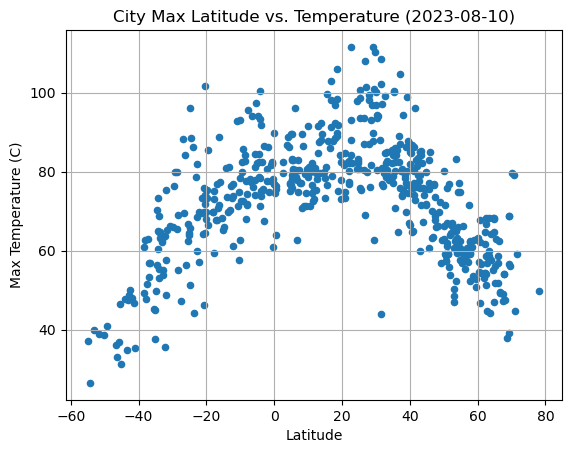

In [94]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", y="Max Temp", x="Lat", grid=True, 
                  title="City Max Latitude vs. Temperature (2023-08-10)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("../output_data/sg_Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

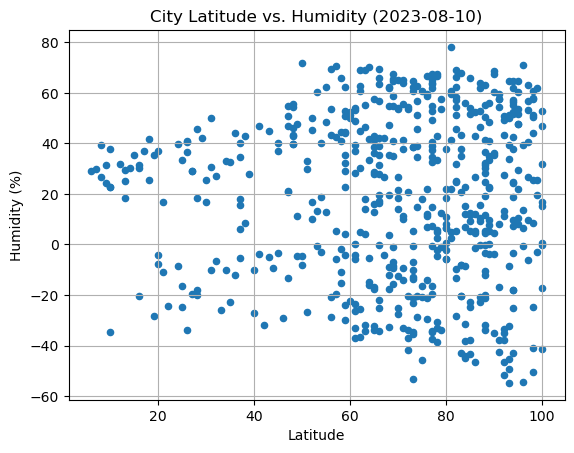

In [95]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", y="Lat", x="Humidity", grid=True,  
                  title="City Latitude vs. Humidity (2023-08-10)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/sg_Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

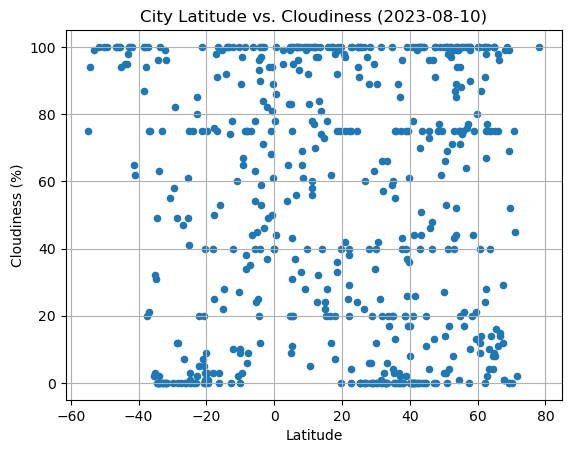

In [96]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", y="Cloudiness", x="Lat", grid=True,  
                  title="City Latitude vs. Cloudiness (2023-08-10)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../output_data/sg_Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

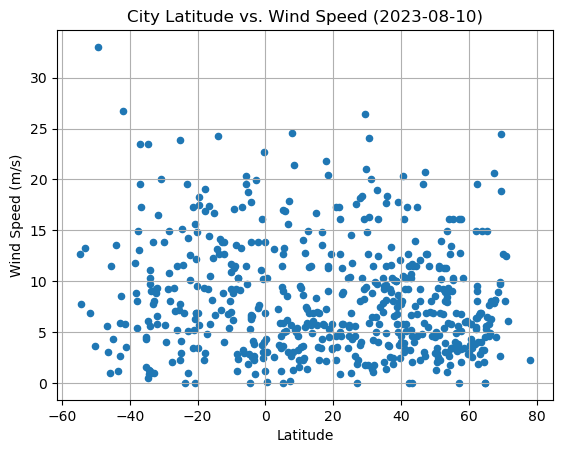

In [97]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", y="Wind Speed", x="Lat", grid=True,  
                  title="City Latitude vs. Wind Speed (2023-08-10)")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/sg_Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [99]:
# Define a function to create Linear Regression plots
x_values = 
y_values = 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (" , "), fontsize=15, color="red")

print(f"The r-value is: {rvalue}")

plt.show()

In [100]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,56.62,56,69,24.47,RU,1691690522
2,puerto penasco,31.3167,-113.5333,87.91,66,25,20.00,MX,1691690452
6,hawaiian paradise park,19.5933,-154.9731,73.04,99,100,5.75,US,1691690539
8,qaqortoq,60.7167,-46.0333,46.74,73,12,4.27,GL,1691690541
10,yellowknife,62.4560,-114.3525,66.72,55,75,8.05,CA,1691690489


In [101]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,invercargill,-46.4000,168.3500,33.03,92,100,3.00,NZ,1691690523
3,port-aux-francais,-49.3500,70.2167,41.00,93,100,33.02,TF,1691690532
4,puerto natales,-51.7236,-72.4875,38.97,92,100,6.89,CL,1691690538
5,masina,-4.3836,15.3914,84.54,50,96,5.26,CD,1691690539
7,santana,-0.0583,-51.1817,89.78,66,40,13.80,BR,1691690540


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6512176461298309


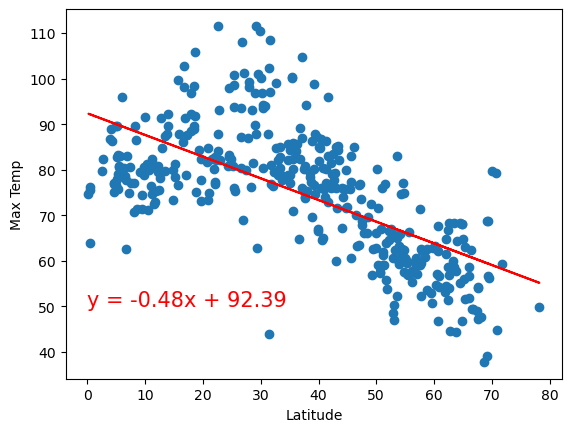

In [103]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (0,50), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: 0.7689318884277114


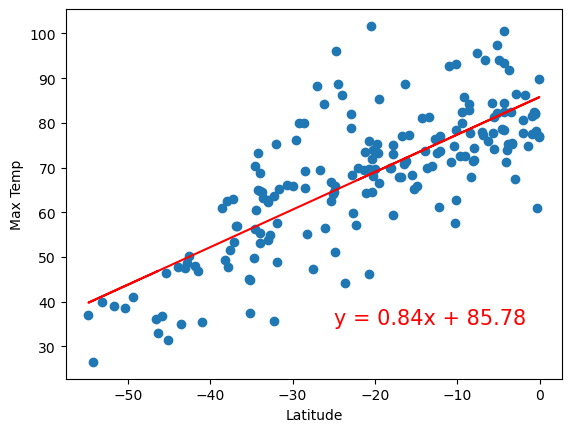

In [106]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (-25,35), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.054607848908308575


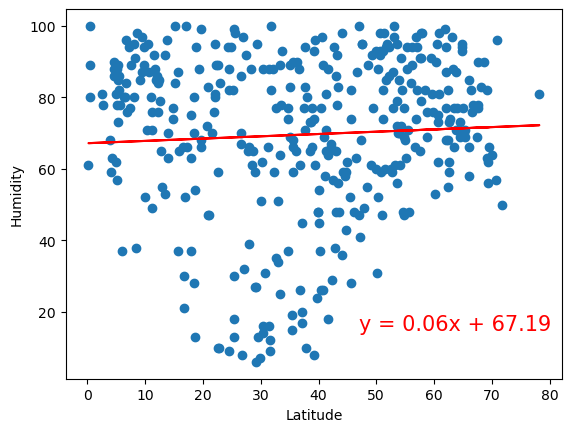

In [107]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (47,15), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.2211077901255425


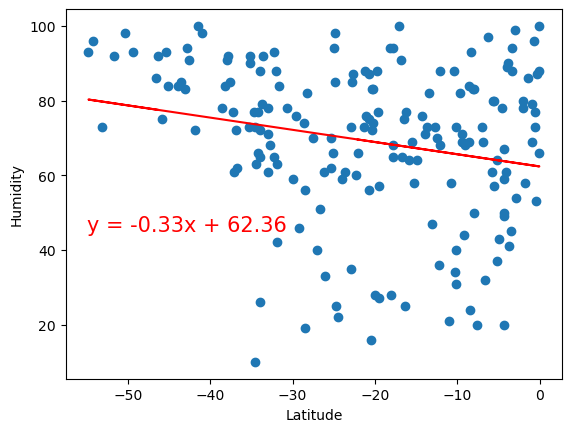

In [108]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (-55,45), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.08179247303189739


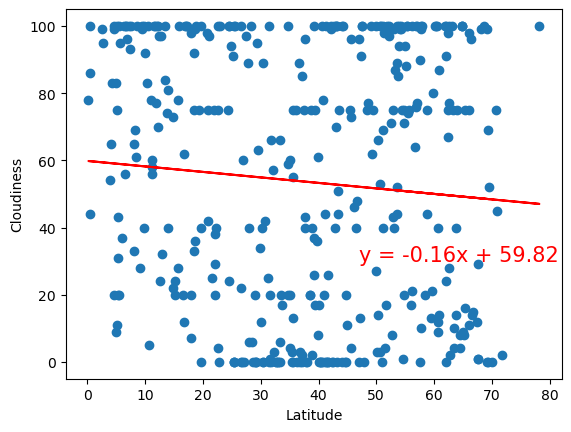

In [109]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (47,30), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.041572553545119094


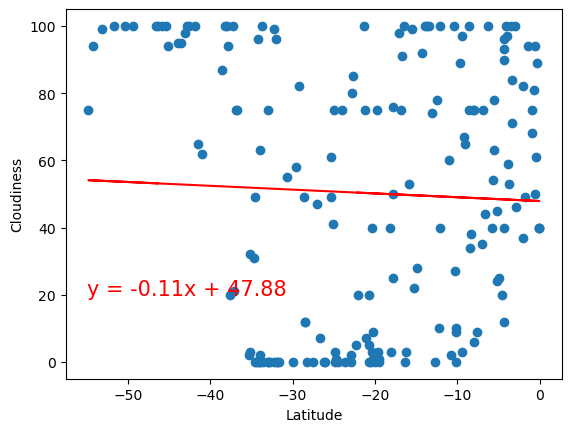

In [110]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (-55,20), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.029767838853035623


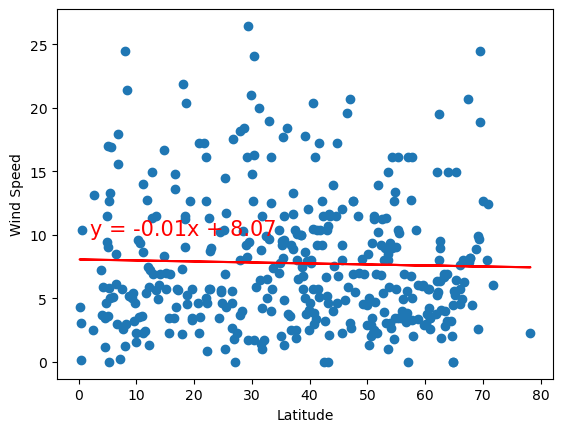

In [111]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (2,10), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

The r-value is: -0.014966590825992804


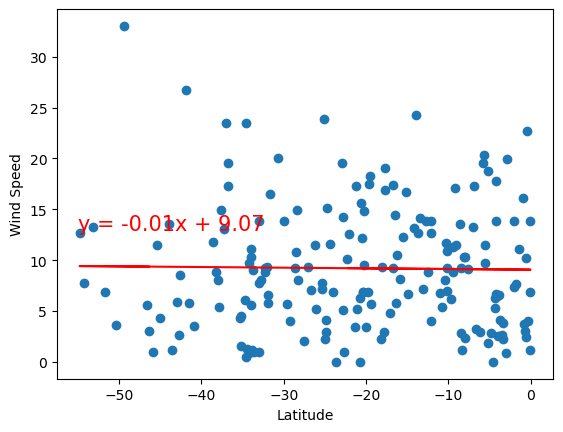

In [112]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

plt.annotate(line_eq, (-55,13), fontsize=15, color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** 

In the northern hemisphere, temperature is negatively correlated with latitude

In the southern hemisphere, temperature is positively correlated with latitude

There is no correlation between latitude and wind speed/cloudiness/humidity in either hemisphere